### Importing libraries and Exploring the Dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('breast-cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 24)

### Definining Exploratory Data Analysis with an overview of the whole project

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
encoder=preprocessing.LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [ ]:
for i in df.columns:
    print(i," = ",df[i].corr(df['diagnosis']))

id  =  0.039768509621717005
diagnosis  =  1.0
radius_mean  =  0.730028511375456
texture_mean  =  0.41518529984520436
perimeter_mean  =  0.7426355297258328
area_mean  =  0.7089838365853895
smoothness_mean  =  0.35855996508593185
compactness_mean  =  0.5965336775082529
concavity_mean  =  0.6963597071719053
concave points_mean  =  0.7766138400204352
symmetry_mean  =  0.33049855426254704
fractal_dimension_mean  =  -0.01283760269843237
radius_se  =  0.5671338208247175
texture_se  =  -0.008303332973877402
perimeter_se  =  0.5561407034314829
area_se  =  0.548235940278024
smoothness_se  =  -0.06701601057948729
compactness_se  =  0.29299924424885826
concavity_se  =  0.25372976598083014
concave points_se  =  0.40804233271650453
symmetry_se  =  -0.006521755870647956
fractal_dimension_se  =  0.07797241739025611
radius_worst  =  0.7764537785950392
texture_worst  =  0.45690282139679805
perimeter_worst  =  0.7829141371737587
area_worst  =  0.7338250349210507
smoothness_worst  =  0.4214648610664024
co

In [ ]:
df.drop(['id','fractal_dimension_mean','texture_se','symmetry_se','perimeter_se','area_se','area_mean','radius_mean'],axis=1,inplace=True)

<AxesSubplot:>

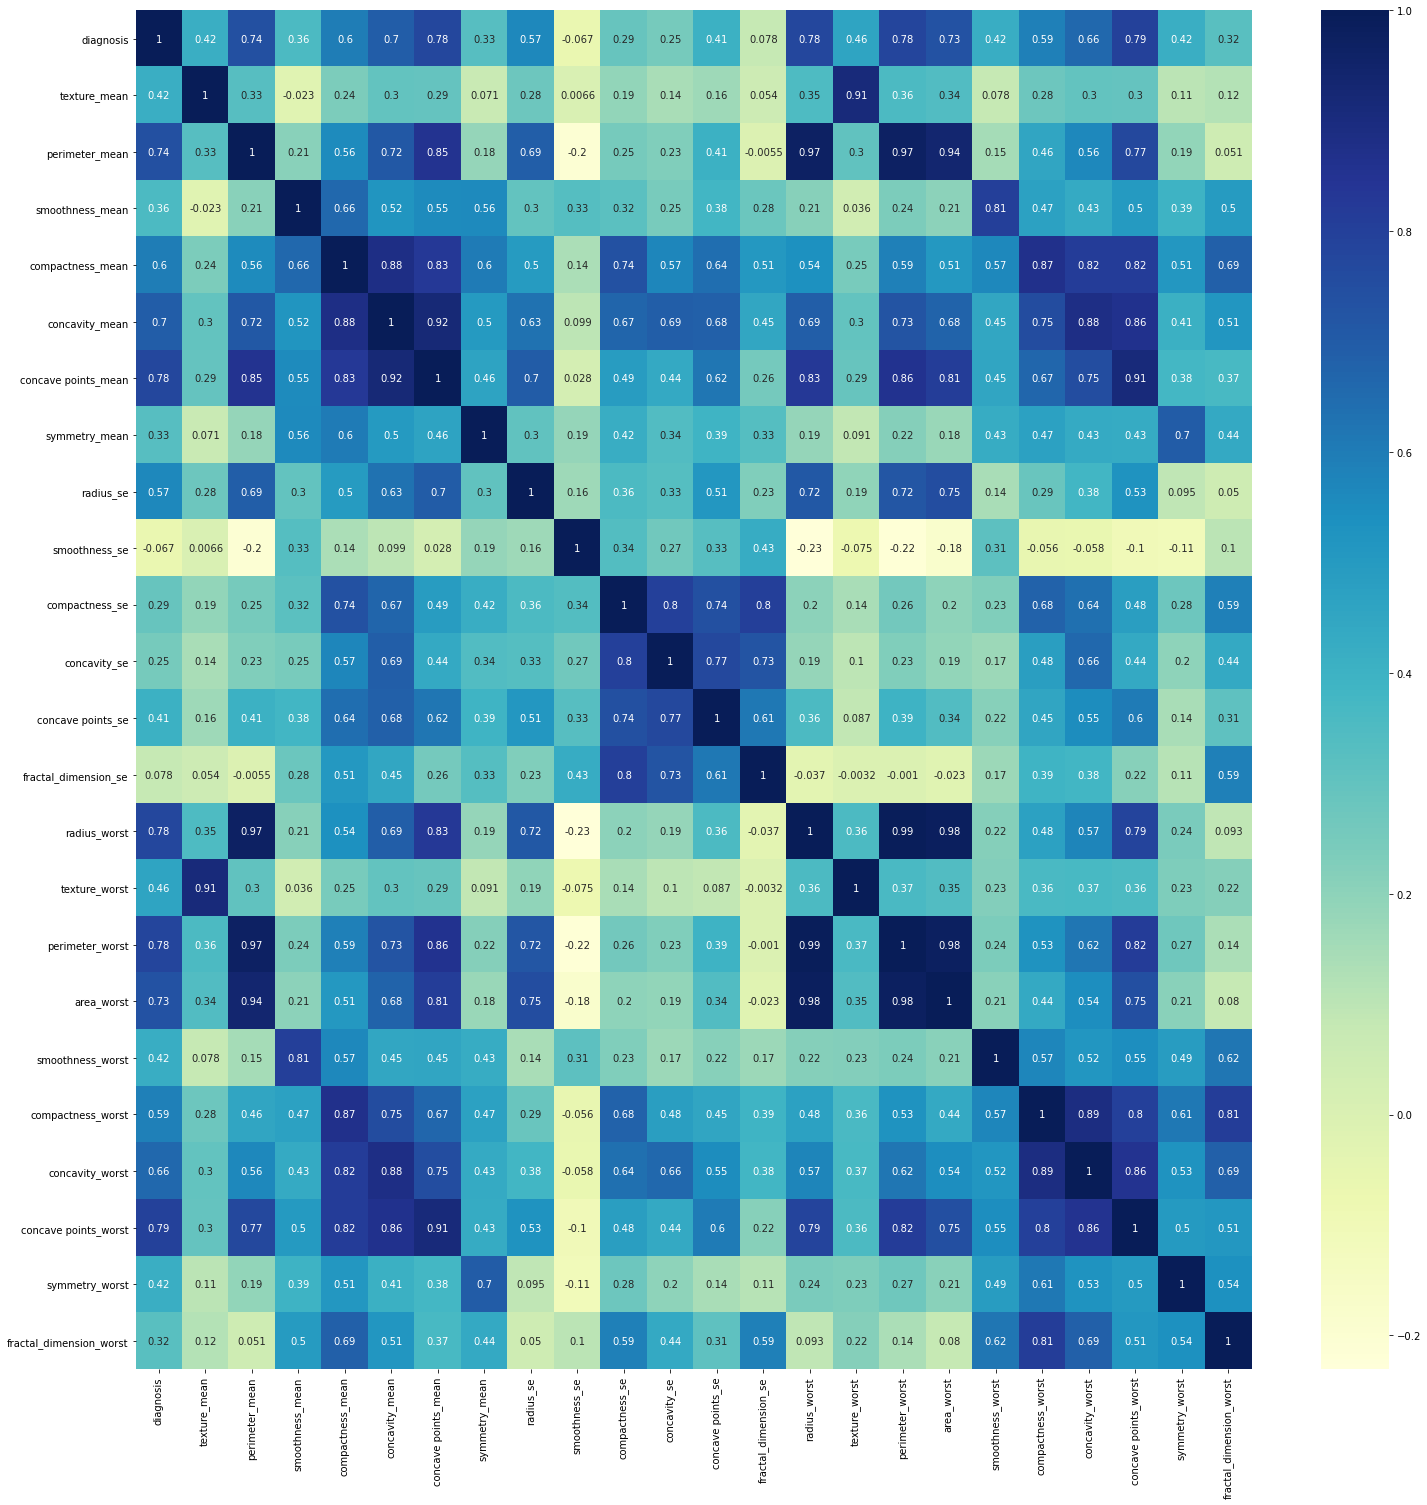

In [ ]:
plt.figure(figsize=(25,25))
sb.heatmap(df.corr(), annot=True,cmap='YlGnBu')

In [ ]:
df.head()

,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,smoothness_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,0.006399,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,0.005225,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,0.006150,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,0.009110,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,0.011490,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<ipython-input-228-264c2928f482>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


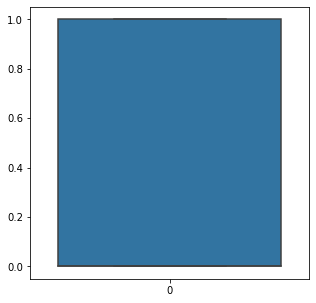

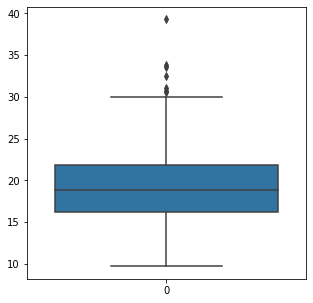

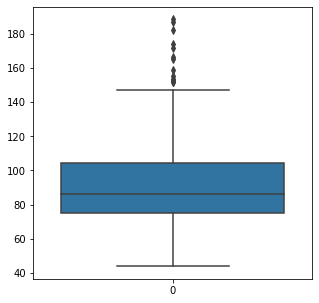

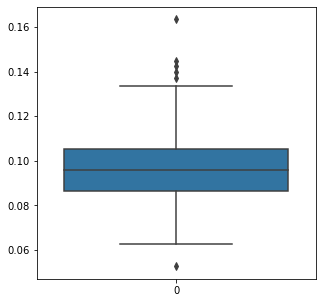

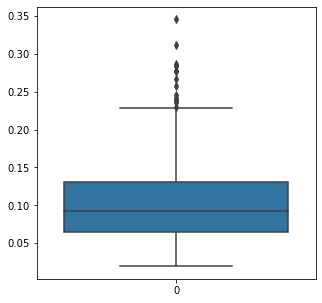

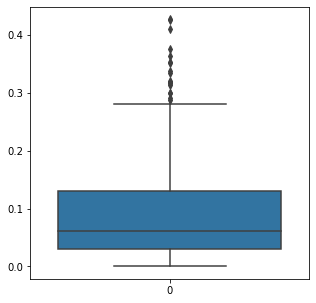

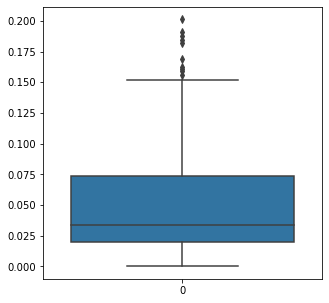

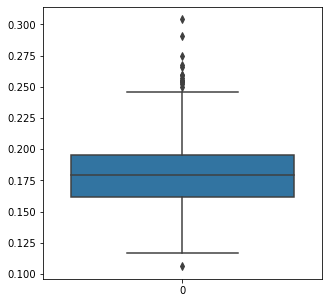

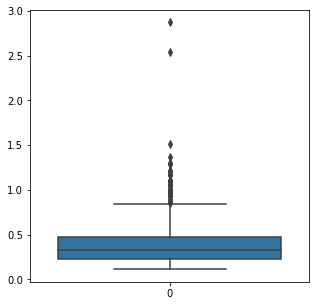

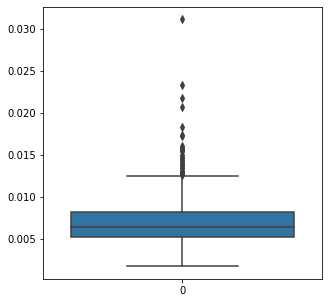

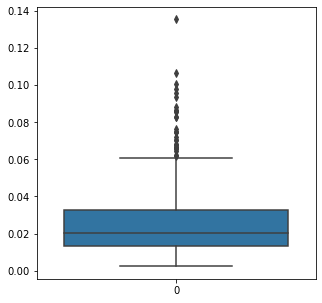

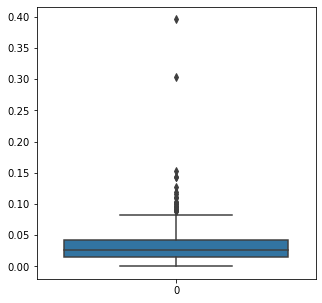

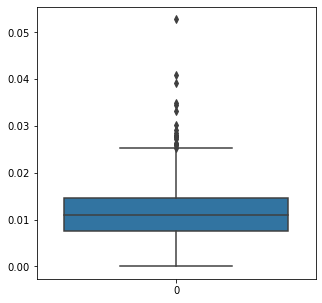

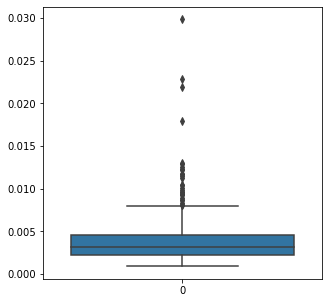

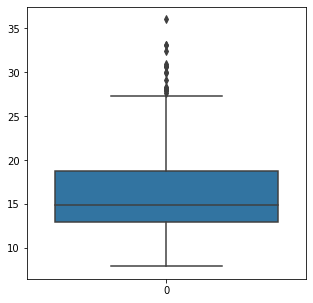

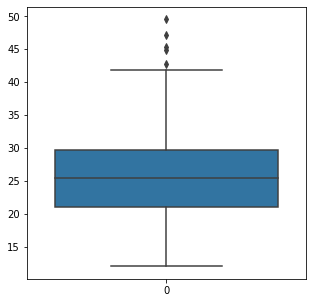

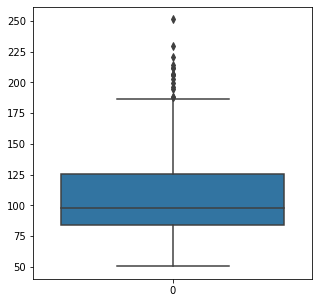

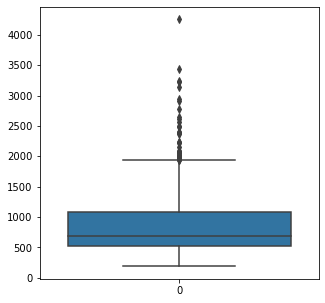

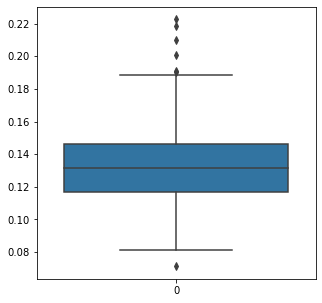

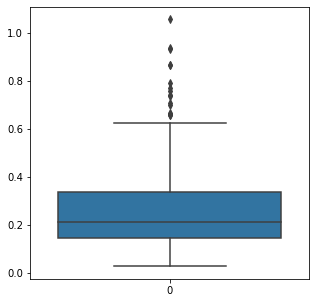

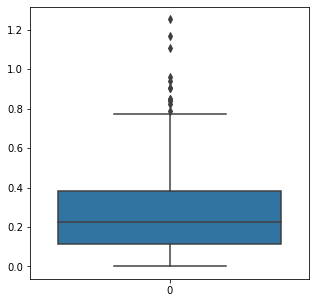

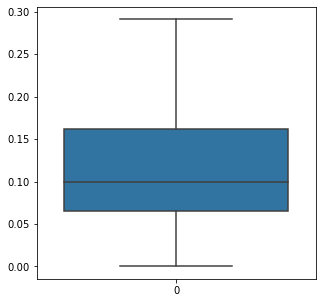

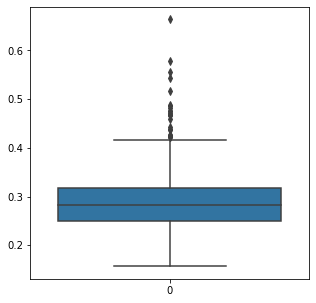

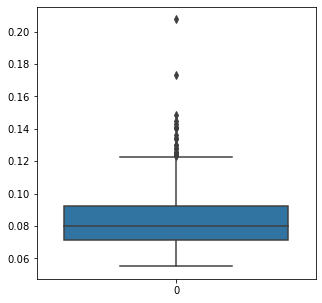

In [ ]:
for i in df.columns:
    plt.figure(figsize=(5,5))
    sb.boxplot(data=df[i])

<ipython-input-229-3112443a2823>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


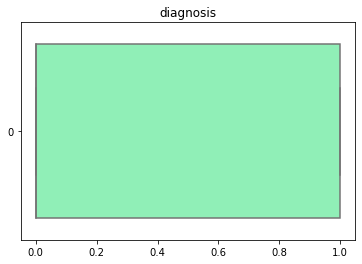

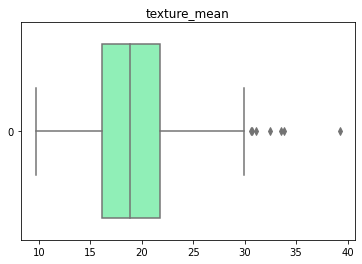

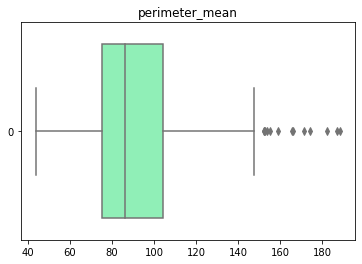

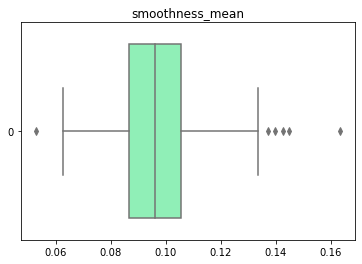

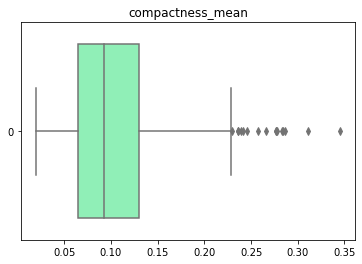

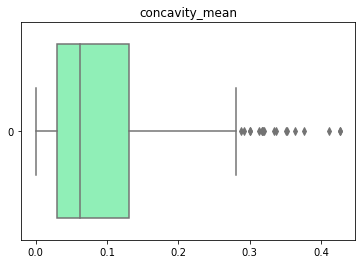

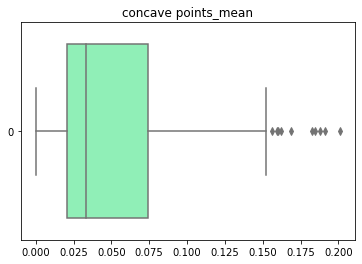

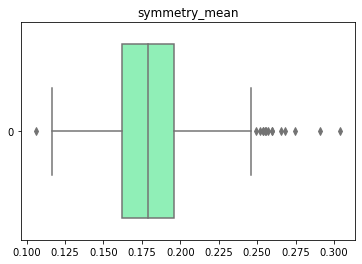

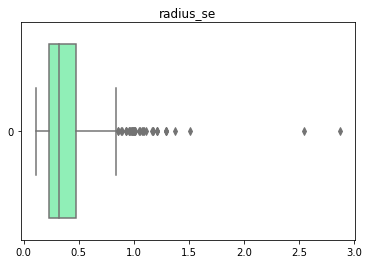

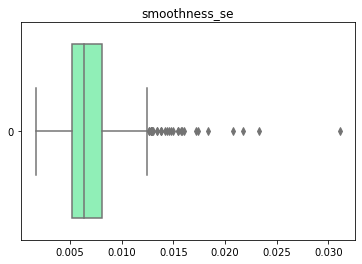

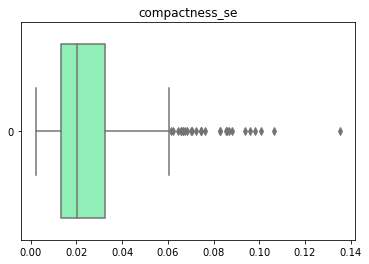

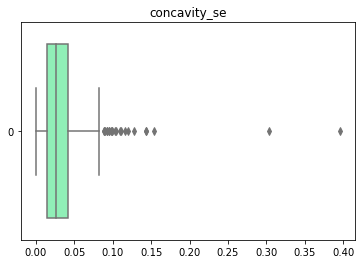

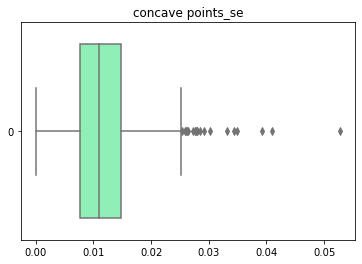

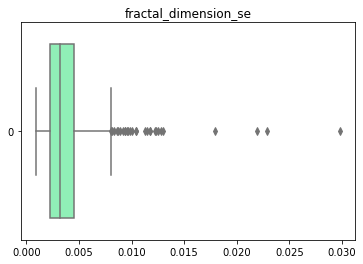

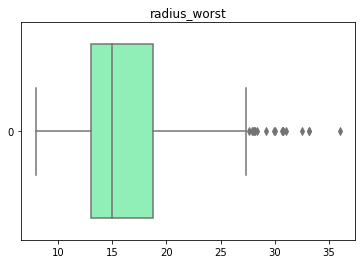

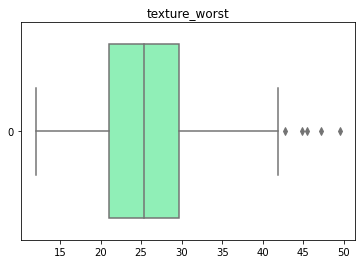

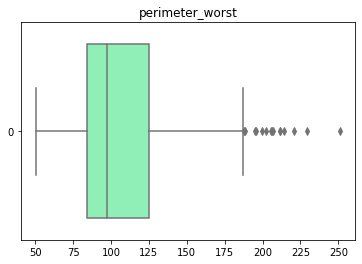

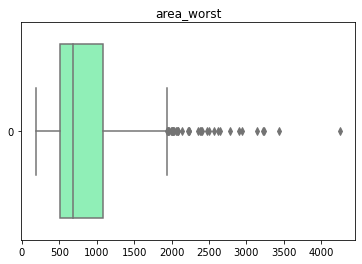

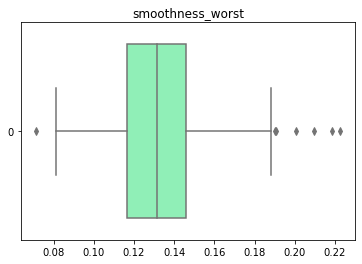

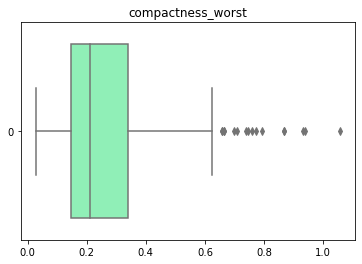

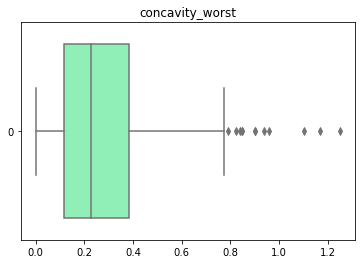

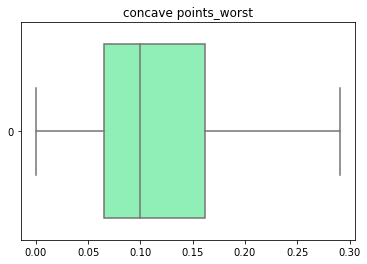

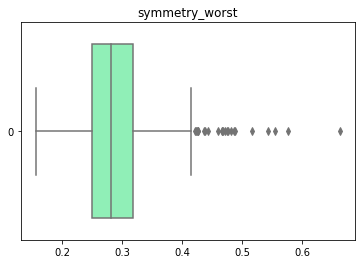

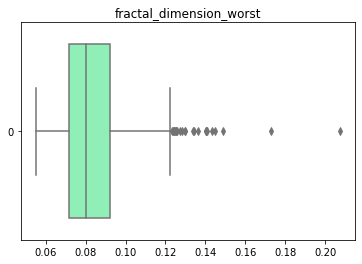

In [ ]:
#df_numeric = df.loc[:, numeric_list]

for i in df.columns:
    plt.figure()
    sns.boxplot(data=df[i],palette='rainbow',orient='h')
    plt.title(i)

In [ ]:
df.head()

,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,smoothness_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,0.006399,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,0.005225,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,0.006150,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,0.009110,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,0.011490,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<ipython-input-231-3112443a2823>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


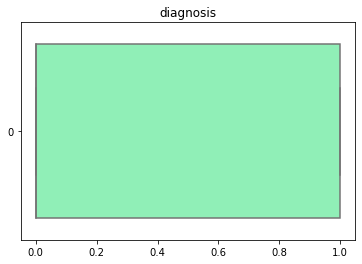

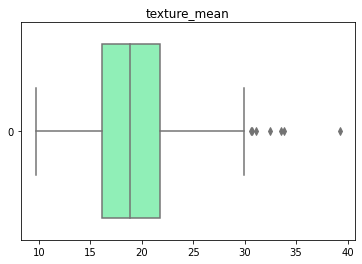

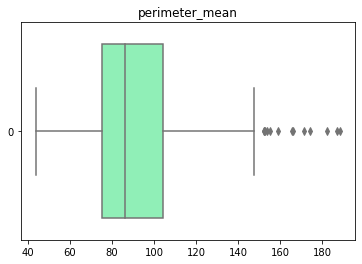

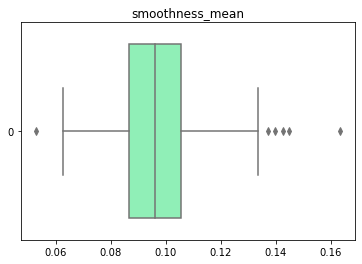

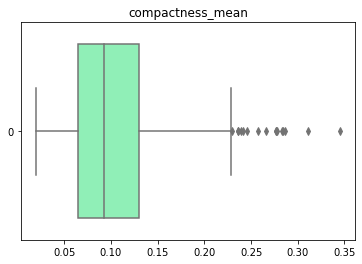

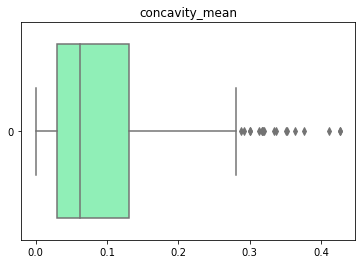

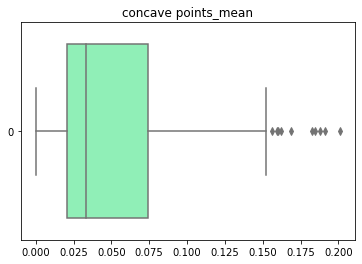

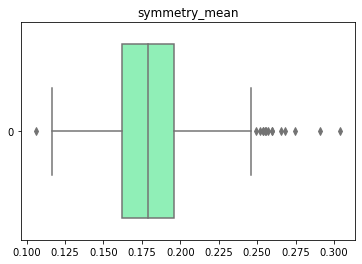

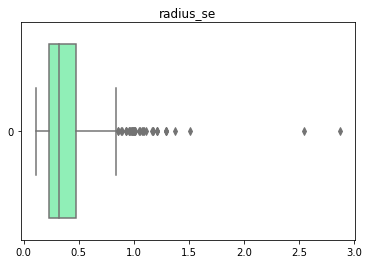

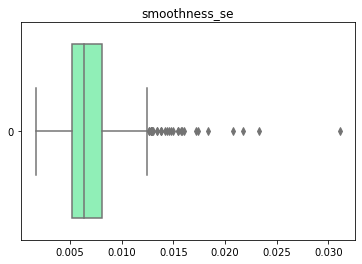

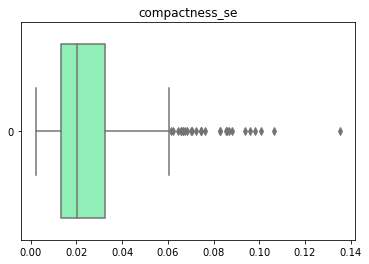

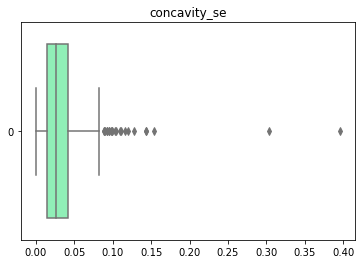

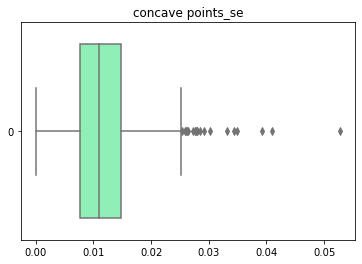

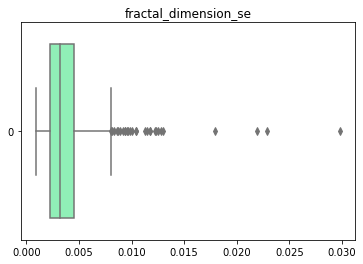

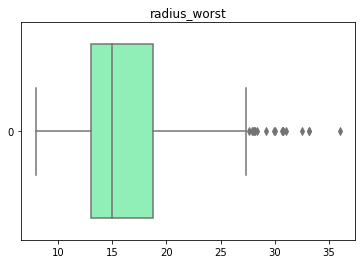

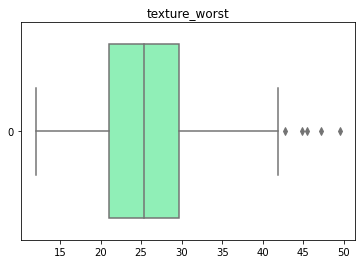

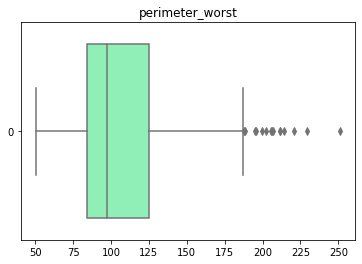

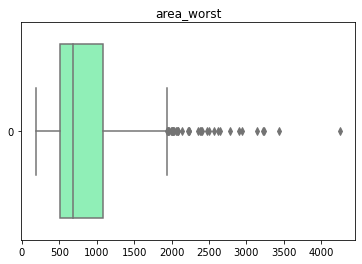

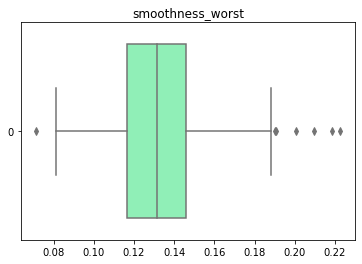

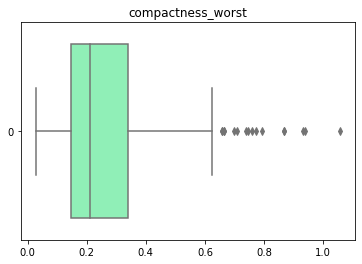

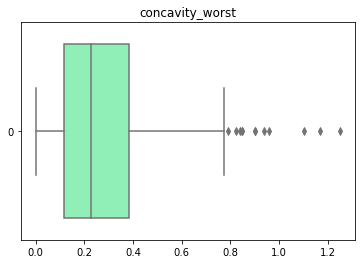

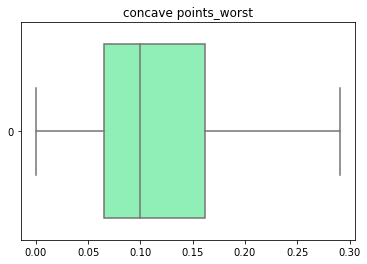

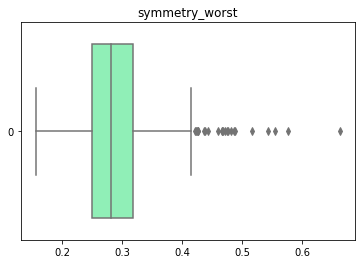

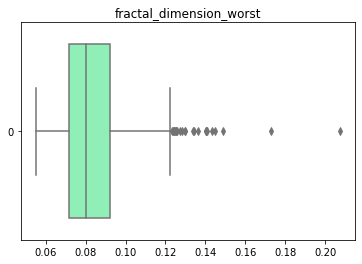

In [ ]:
#df_numeric = df.loc[:, numeric_list]

for i in df.columns:
    plt.figure()
    sns.boxplot(data=df[i],palette='rainbow',orient='h')
    plt.title(i)

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [ ]:
col=X.columns
object = StandardScaler()
X = object.fit_transform(X)

In [ ]:
X=pd.DataFrame(X,columns=col)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### create a model that fits the data


In [ ]:
model = LogisticRegression(random_state=42)
model = model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9868131868131869

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.9824561403508771

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

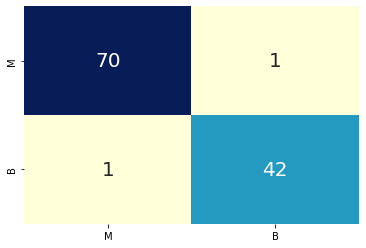

In [ ]:
from sklearn.metrics import confusion_matrix


cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu') # font size